# Purpose of this notebook

To be a brief comparison to packages that provide more generic NLP functionality. 

Except that these days there are quite a few, and we can only point out there is no shortage of choices,
and that this is not an endorsement of any - it ends up depending on your purposes.

Choices include, in no particular order:

- [spacy](https://spacy.io/usage/spacy-101) - see also our own [methods_nlp__spacy_basics](methods_nlp__spacy_basics.ipynb)
  - ~two dozen languages, including Dutch
  - this one seems like a convenient generic choice to us, yet most of the things it does are also done - sometimes better - by other choices

- [pattern](https://github.com/clips/pattern)
  - 6 languages, including Dutch

- [flair](https://github.com/flairNLP/flair)
  - 4 languages, including Dutch

- [stanza](https://stanfordnlp.github.io/stanza/)
  - ~80 languages, including Dutch
  - and note there is e.g. a [spacy-stanza](https://spacy.io/universe/project/spacy-stanza/)

- [UDPipe](https://lindat.mff.cuni.cz/services/udpipe/)
  - various languages, including Dutch
  - and note there is a [spacy-udpipe](https://spacy.io/universe/project/spacy-udpipe)

- [alpino](https://www.let.rug.nl/vannoord/alp/Alpino/)
  - and note there is e.g. a [spacy-alpino](https://pypi.org/project/spacy-alpino/)

- [trankit](https://github.com/nlp-uoregon/trankit)
  - 50+ languages, including Dutch 
  - and note there is e.g. a [spacy-trankit](https://pypi.org/project/spacy-trankit/)

- [nltk](https://www.nltk.org/)
  - different components seem to support different languages, Dutch is not supported in all of them out-of-the-box
  - though [training basic support is relatively simple](https://stackoverflow.com/questions/40212895/nltk-tag-dutch-sentence)

- [textblob](https://textblob.readthedocs.io/en/dev/) 
  - language-extensible, but out of the box it seems to focus just on English
  - so no Dutch support, though [there's this](https://github.com/gvisniuc/textblob-nl)

- [CoreNLP](https://stanfordnlp.github.io/CoreNLP/)
  - 8 languages, no Dutch

- [NLP-Cube](https://github.com/Adobe/NLP-Cube)
  - 8 languags (?), no Dutch?

...in part just to mention them, in part to help you choose one.

# Decide when you need these - and when you may _not_ need these

There are also various tasks that are automated, 
or common enough that there are plenty of interactive tools, from widgets as code, to complete no-code solutions.

Data annotation is a good example of this. You want documents going in one side,
annotation data coming in the other side, and a quick web search for purely-online annotation 
reveals tools like [label studio](https://labelstud.io/), [docanno](https://doccano.github.io/doccano/),
[ML-annotate](https://github.com/falcony-io/ml-annotate), [brat](http://brat.nlplab.org/), [annotator.js](http://annotatorjs.org/)
to more purpose-specific projectss such as [lawnotation](https://www.lawnotation.org/).

The extent of your questions come down to 
- "after I do a lot of clicks, how is the thing it spits out usable to me?",
- "is this particular tool already aware of the language and scope I'm working in, and does it try to help me along?"

and specifically _not_
- "what do I need to install"
- "what do I need to learn to even get started, in terms of programming, how your your package works, whether the output is what I need in the first place"



In [14]:
import pprint

test = "Python is a high-level, general-purpose programming language. It can be quite useful."

# Some minimal examples

## spacy

In [ ]:
!pip3 install -U spacy

In [15]:
import spacy
english_lg  = spacy.load('en_core_web_lg')   

ana = english_lg( test )

pprint.pprint(
    [list( (tok.text, tok.pos_)  for tok in ana ),
     list(ana.sents)]
)

[[('Python', 'PROPN'),
  ('is', 'AUX'),
  ('a', 'DET'),
  ('high', 'ADJ'),
  ('-', 'PUNCT'),
  ('level', 'NOUN'),
  (',', 'PUNCT'),
  ('general', 'ADJ'),
  ('-', 'PUNCT'),
  ('purpose', 'NOUN'),
  ('programming', 'NOUN'),
  ('language', 'NOUN'),
  ('.', 'PUNCT'),
  ('It', 'PRON'),
  ('can', 'AUX'),
  ('be', 'AUX'),
  ('quite', 'ADV'),
  ('useful', 'ADJ'),
  ('.', 'PUNCT')],
 [Python is a high-level, general-purpose programming language.,
  It can be quite useful.]]


## Textblob

See also https://textblob.readthedocs.io/en/dev/quickstart.html

In [ ]:
!pip3 install -U textblob

In [16]:
from textblob import TextBlob

ana = TextBlob( test )

pprint.pprint(
    [ana.tags,
     ana.sentences]
)

[[('Python', 'NNP'),
  ('is', 'VBZ'),
  ('a', 'DT'),
  ('high-level', 'JJ'),
  ('general-purpose', 'JJ'),
  ('programming', 'NN'),
  ('language', 'NN'),
  ('It', 'PRP'),
  ('can', 'MD'),
  ('be', 'VB'),
  ('quite', 'RB'),
  ('useful', 'JJ')],
 [Sentence("Python is a high-level, general-purpose programming language."),
  Sentence("It can be quite useful.")]]


## NLTK

In [21]:
from nltk import word_tokenize, sent_tokenize

pprint.pprint(
    [word_tokenize(test), 
     sent_tokenize(test)])


[['Python',
  'is',
  'a',
  'high-level',
  ',',
  'general-purpose',
  'programming',
  'language',
  '.',
  'It',
  'can',
  'be',
  'quite',
  'useful',
  '.'],
 ['Python is a high-level, general-purpose programming language.',
  'It can be quite useful.']]


## pattern

In [ ]:
!pip3 install pattern

In [44]:
from pattern.en import parse
ana = parse(test,
     tokenize = True,  
         tags = True,  
       chunks = True,  
    relations = True,  
      #lemmata = True,  
        light = False)


In [45]:
pprint.pprint( ana.split() )


[[['Python', 'NNP', 'B-NP', 'O', 'NP-SBJ-1'],
  ['is', 'VBZ', 'B-VP', 'O', 'VP-1'],
  ['a', 'DT', 'B-NP', 'O', 'NP-OBJ-1'],
  ['high-level', 'JJ', 'I-NP', 'O', 'NP-OBJ-1'],
  [',', ',', 'I-NP', 'O', 'NP-OBJ-1'],
  ['general-purpose', 'JJ', 'I-NP', 'O', 'NP-OBJ-1'],
  ['programming', 'NN', 'I-NP', 'O', 'NP-OBJ-1'],
  ['language', 'NN', 'I-NP', 'O', 'NP-OBJ-1'],
  ['.', '.', 'O', 'O', 'O']],
 [['It', 'PRP', 'B-NP', 'O', 'NP-SBJ-1'],
  ['can', 'MD', 'B-VP', 'O', 'VP-1'],
  ['be', 'VB', 'I-VP', 'O', 'VP-1'],
  ['quite', 'RB', 'B-ADJP', 'O', 'O'],
  ['useful', 'JJ', 'I-ADJP', 'O', 'O'],
  ['.', '.', 'O', 'O', 'O']]]


## CoreNLP

See also https://stanfordnlp.github.io/CoreNLP/

## flair

In [ ]:
!pip3 install flair

In [ ]:
from flair.data import Sentence
from flair.nn import Classifier

# make a sentence
sentence = Sentence('De minister kan in Parijs opduiken.',language_code='nl')

# load the NER tagger
tagger = Classifier.load('ner')

# run NER over sentence
tagger.predict(sentence)

# print the sentence with all annotations
print(sentence)

2024-11-01 15:14:35,772 SequenceTagger predicts: Dictionary with 20 tags: <unk>, O, S-ORG, S-MISC, B-PER, E-PER, S-LOC, B-ORG, E-ORG, I-PER, S-PER, B-MISC, I-MISC, E-MISC, I-ORG, B-LOC, E-LOC, I-LOC, <START>, <STOP>
Sentence[7]: "De minister kan in Parijs opduiken." → ["Parijs"/LOC]


# Combinations

There are various efforts to combine the outputs of different libraries, 
particularly where they achieve different things.

From what we've seen, many of this seems to be "let's duct tape it onto spacy" efforts,
which often tries to integrate it into spacy's "a Document is a series ot Tokens and Spans" view.

Some of these definitely earn the 'duct taped' description.

---

Others may e.g. wrap another library and presends it as spacy's Document-Token interface,
so you can combine and/or compare without the need to rewrite your existing code (e.g. spacy-stanza, spacy-udpipe).


---

Many of these these can be found in [this project list](https://spacy.io/universe)

Note that the examples are _not_ meant as a list of options, just as examples of some added usefulness _and_ of that duct tape.

## spacy-stanza 

https://spacy.io/universe/project/spacy-stanza


In [ ]:
# plain stanza already looks similar:
import stanza
stanza.download('nl')

In [ ]:
nlp = stanza.Pipeline('nl',logging_level='ERROR')
doc = nlp("De minister kan in Parijs opduiken.") # run annotation over a sentence
doc.entities

[{
   "text": "Parijs",
   "type": "LOC",
   "start_char": 19,
   "end_char": 25
 }]

In [ ]:
!pip3 install spacy_stanza

In [5]:
# spacy-stanza makes that act like spacy even more
import stanza
import spacy_stanza

stanza.download("nl")
nlp = spacy_stanza.load_pipeline("nl")

doc = nlp("De minister kan in Parijs opduiken.")
for token in doc:
    print(token.text, token.lemma_, token.pos_, token.dep_, token.ent_type_)
print(doc.ents)

2024-11-01 14:03:04.543577: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-11-01 14:03:04.793500: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-11-01 14:03:07.048329: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-11-01 14:03:07.050960: I tensorflow/comp

De de DET det 
minister minister NOUN nsubj 
kan kunnen AUX aux 
in in ADP case 
Parijs Parijs PROPN obl LOC
opduiken op_duiken VERB root 
. . PUNCT punct 
(Parijs,)


## spacy-benepar, and adding some nltk, why not

(Note that benepar does not have a Dutch model, so isn't directly relevant to this project)


Spacy has a dependency parser, but not a constituency parser.

Constituency parsers give the more classical "verb phrase containing a noun phrase" view on sentences. 
These have fallen out of style somewhat, and there isn't a high quality one for every language,
but they definitely still have their uses.

In [ ]:
!pip3 install benepar

In [ ]:
import collections
import nltk, benepar, spacy

bpname = 'benepar_en3'
benepar.download( bpname )

nlp = spacy.load('en_core_web_lg')
if spacy.__version__.startswith('2'):
    nlp.add_pipe(benepar.BeneparComponent(bpname))
else:
    nlp.add_pipe("benepar", config={"model":bpname})

doc = nlp("I like cheese and you like ham.")

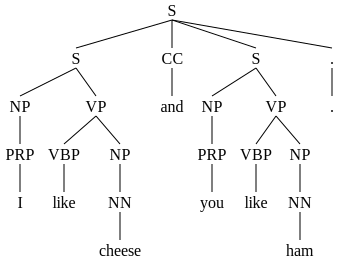

I like cheese and /
you like ham . /


In [ ]:
for sent in list(doc.sents):
    # one random idea based on a constituency parse: to estimate how well sentences at more clause-boundary-like places
    # - this basically counts the amount of brackets at each token position (and remembering that in terms of token index)
    #   Every time a bunch of brackets are closed at once, we decide we might split there.
    # - You _can_ interrogate sent._.constituents for this, and this is arguably a less error-prone thing to do.
    #   For the example, though, we take the tree output out, as a string, 
    #   and then parse that in nltk and do our work there.

    ps = sent._.parse_string.replace("(","[").replace(")","]") # slightly different markup
    nltk_tree = nltk.Tree.fromstring( sent._.parse_string )
    display(nltk_tree) # nltk also shows us that parse visually; spacy-benepar doesn't seem to

    # will count into these. Defaultdict lets us skip the 'initialize with all indices in the list
    start_counts = [0]*(len(sent)+1) # +1 because the below is meant to allow [start:end] so end is one higher than the actual last index
    end_counts   = [0]*(len(sent)+1)

    for c in sent._.constituents:
        start_counts[c.start] += 1 
        end_counts[c.end] += 1 

    diffs   = list( end_counts[i] - start_counts[i] for i in range(min(len(end_counts), len(start_counts))) )
    maxdiff = max(diffs)

    for toki, tok in enumerate(sent):
        bracket_diff = diffs[toki]
        # print the word
        print( tok, end=' ' )
        # print the amount of closing between this and the next word (basically, the amount that the tree depth decreases)
        #print( max(0,bracket_diff), end=' ') # negative means opening, right now we don't care about that so report it as zero

        # a bunch of brackets,  or it being a considerable fraction of the depth differences overall (might work better in shallower trees)
        if bracket_diff >= 3    or  bracket_diff > 0.4*maxdiff: 
            print( '/' )

## spacy-alpino 

Alpino is a Dutch dependency parser. 

It looks like spacy's provided dutch models are based on alpino, 
so you may not care for doing this with extra steps,
until you have a specific reason to.

## spacy-udpipe

In [ ]:
!pip3 install spacy_udpipe

In [22]:
import spacy_udpipe
spacy_udpipe.download("nl")
nlp = spacy_udpipe.load("nl")

doc = nlp("De minister kan in Parijs opduiken.")
for token in doc:
    print(token.text, token.lemma_, token.pos_, token.dep_, token.ent_type_)
print(doc.ents)

Already downloaded a model for the 'nl' language
De de DET det 
minister minister NOUN nsubj 
kan kunnen AUX aux 
in in ADP case 
Parijs Parijs PROPN obl 
opduiken opduiken VERB ROOT 
. . PUNCT punct 
()
